In [5]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.proportion import proportions_ztest

In [6]:

# Análise de Correlação e Regressão - Carros Usados

url = "https://raw.githubusercontent.com/CristianaMoura/Desafios_Equipe_DadosWomakersCode/refs/heads/master/Desafio_Regressao/desafio_carros_usados.csv"
df = pd.read_csv(url)

# Visualizar primeiras linhas
df.head()



,id,make,model,year,price,mileage,engine_size,fuel_type,transmission,doors,color,tax,mpg,sold_date
0,1,Volkswagen,Model B,2022,23859,94811,3.6,Diesel,Manual,2,Grey,288,39.2,2023-10-11
1,2,Chevrolet,Model A,2008,16953,128028,4.9,Diesel,Manual,5,Red,339,15.3,2021-04-22
2,3,BMW,Model B,2006,12332,49178,4.1,Diesel,Automatic,4,Red,458,37.2,2020-05-04
3,4,Chevrolet,Model B,2018,18475,42821,2.7,Hybrid,Manual,5,Silver,486,43.7,2021-06-20
4,5,Chevrolet,Model C,2017,12129,192799,2.8,Gasoline,Manual,4,Silver,295,19.1,2021-12-06


In [7]:

# Verificar colunas numéricas
numericas = df.select_dtypes(include=['float64', 'int64'])

In [8]:
# Calcular correlações com 'price'
correlacoes = numericas.corr()['price'].sort_values(ascending=False)
print("Correlação com 'price':\n", correlacoes)


Correlação com 'price':
 price          1.000000
id             0.040274
doors          0.033304
mileage        0.011115
tax            0.009043
engine_size   -0.000181
mpg           -0.008201
year          -0.033064
Name: price, dtype: float64


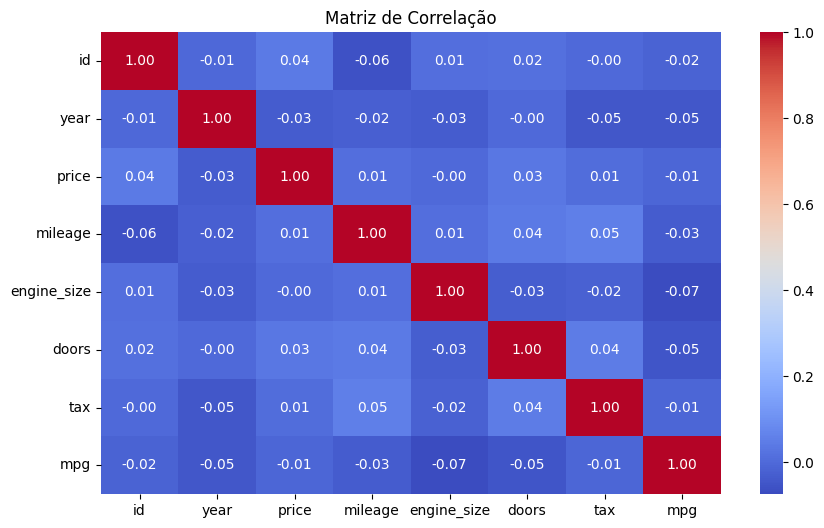

In [9]:
# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numericas.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()


In [10]:
# Top 5 variáveis mais correlacionadas (exceto price)
top5_variaveis = correlacoes.drop('price').head(5).index.tolist()
print(f"Top 5 variáveis mais correlacionadas com o preço: {top5_variaveis}")


Top 5 variáveis mais correlacionadas com o preço: ['id', 'doors', 'mileage', 'tax', 'engine_size']



--- Análise da variável: id ---


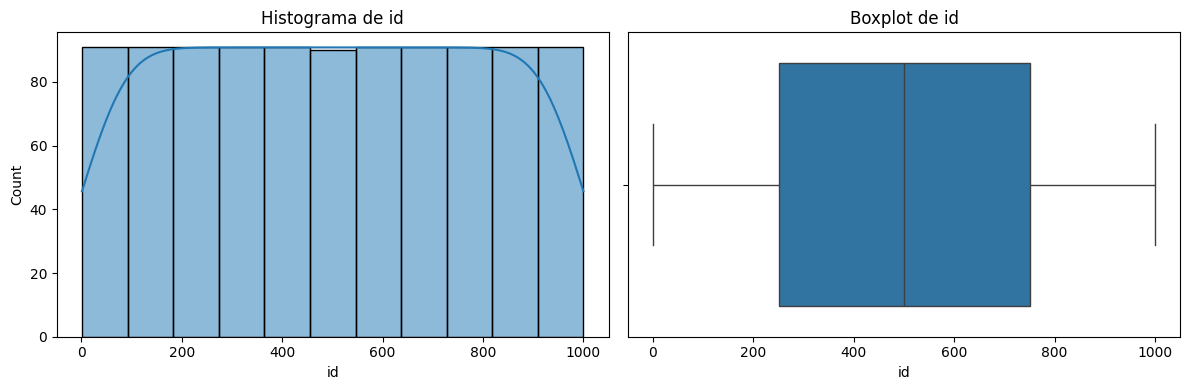

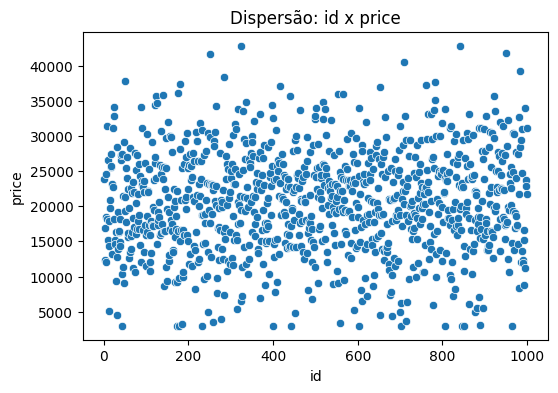


--- Análise da variável: doors ---


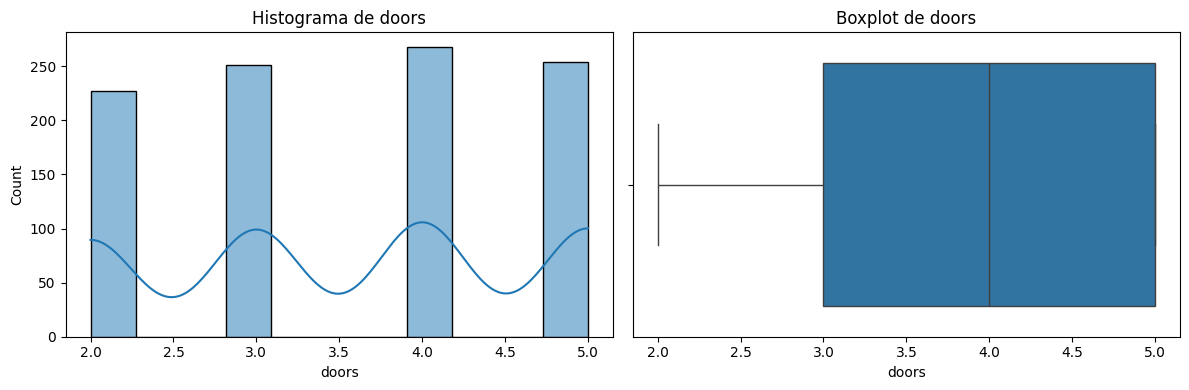

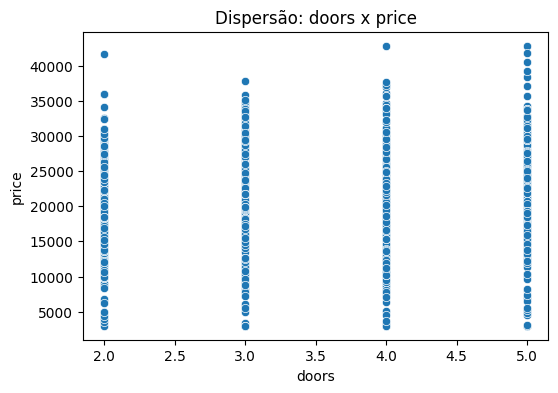


--- Análise da variável: mileage ---


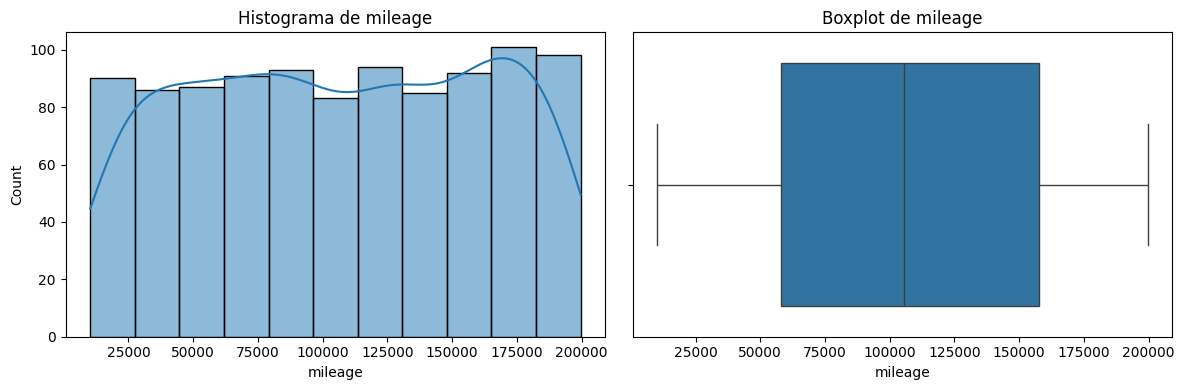

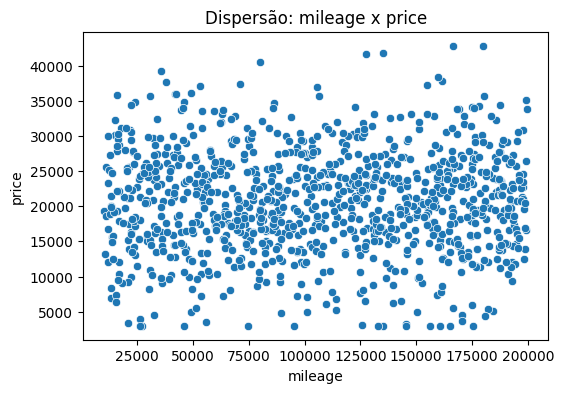


--- Análise da variável: tax ---


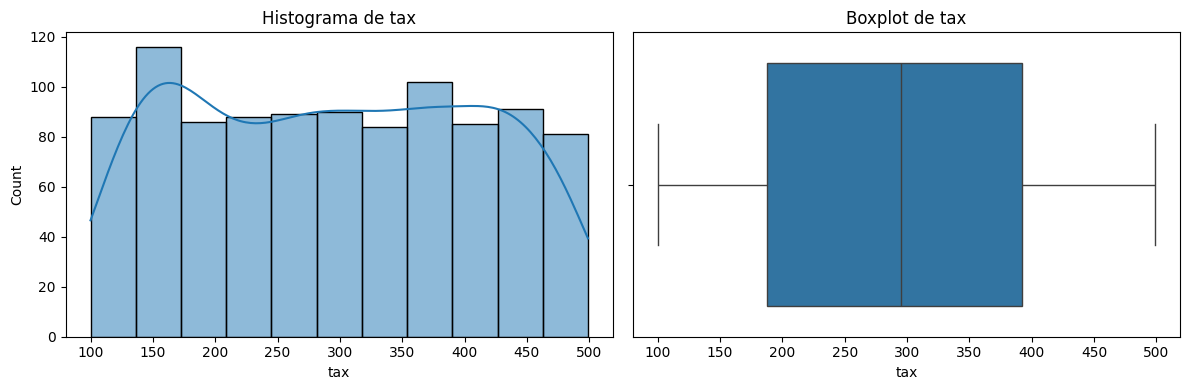

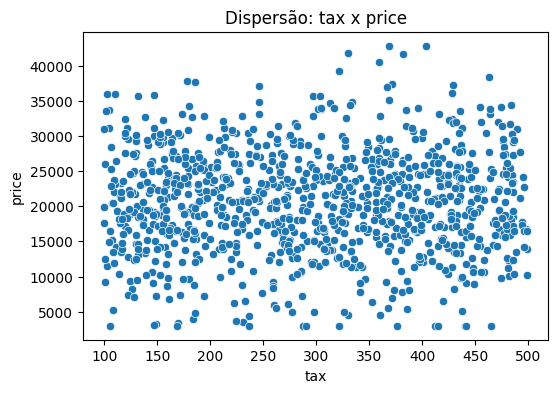


--- Análise da variável: engine_size ---


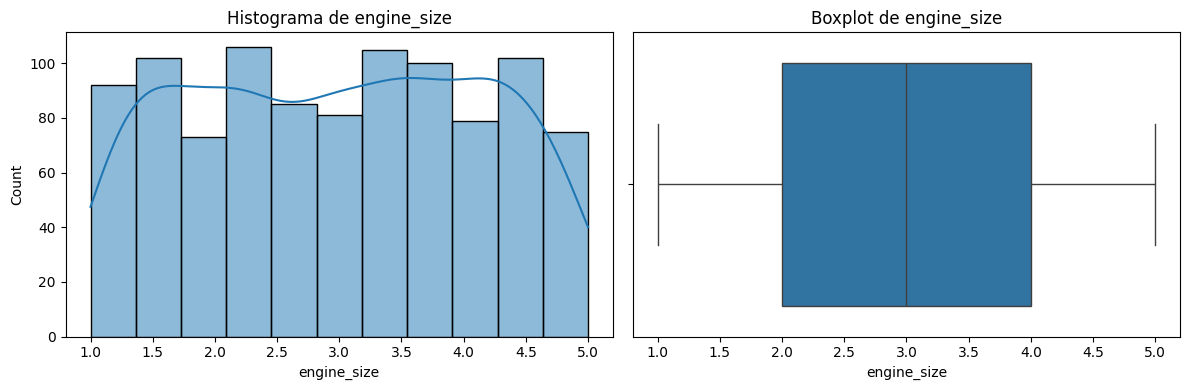

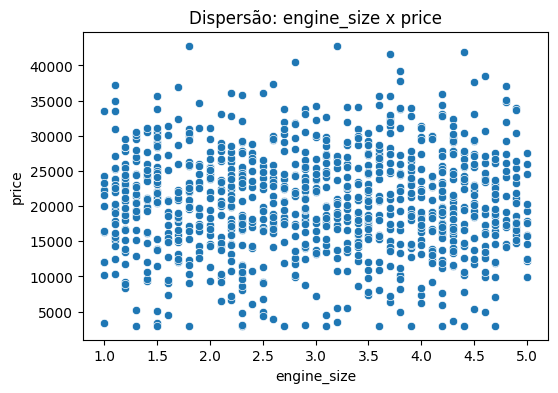

In [11]:
# Loop para análise
for var in top5_variaveis:
    print(f"\n--- Análise da variável: {var} ---")

    # Histograma e Boxplot
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[var], kde=True)
    plt.title(f'Histograma de {var}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot de {var}')
    plt.tight_layout()
    plt.show()

    # Dispersão
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[var], y=df['price'])
    plt.title(f'Dispersão: {var} x price')
    plt.xlabel(var)
    plt.ylabel('price')
    plt.show()


In [ ]:
    # Regressão Linear
   
    X = df[[var]]
    y = df['price']
    modelo = LinearRegression()
    modelo.fit(X, y)
    y_pred = modelo.predict(X)

    coef = modelo.coef_[0]
    intercepto = modelo.intercept_
    r2 = r2_score(y, y_pred)

    print(f"Coeficiente β1: {coef:.2f}")
    print(f"Intercepto β0: {intercepto:.2f}")
    print(f"R²: {r2:.3f} — ({r2*100:.1f}% da variação em price explicada por {var})")


NameError: name 'LinearRegression' is not defined

In [ ]:
    # Gráfico com reta de regressão
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[var], y=df['price'], label='Dados Reais')
    plt.plot(df[var], y_pred, color='red', label='Regressão Linear')
    plt.xlabel(var)
    plt.ylabel('price')
    plt.title(f'Regressão Linear: price ~ {var}')
    plt.legend()
    plt.show()